In [96]:
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [97]:
folder_path = 'output/'
files = os.listdir(folder_path)

In [98]:
csv_files = []

In [99]:
csv_files = [file for file in files if file.endswith('.csv')]
csv_files

['part-00000-f8a882d0-ee77-44cb-a085-df99db7beec4-c000.csv',
 'part-00000-fa6abbca-0c3d-4c5f-a666-835f9f8cddbf-c000.csv',
 'part-00000-4a00b367-43fb-4282-82ea-d39d0ce209e2-c000.csv',
 'part-00000-c09e7bab-70b2-4337-a21a-c0f6144574e1-c000.csv',
 'part-00000-cd7cb23c-7d5b-48a4-ba8d-d97363bbfd81-c000.csv',
 'part-00000-d47f0f02-392a-41b0-b0a6-cbfff404b83b-c000.csv',
 'part-00000-b0132ef1-37fb-442b-bf4f-a164d3696a2a-c000.csv',
 'part-00000-e5d0f19d-1a41-4ebf-a40b-f6508b167271-c000.csv',
 'part-00000-b1ec6e89-e095-4360-af3d-d760958c71ab-c000.csv',
 'part-00000-c3ccf997-8468-4c7c-a63e-8214c78a2cdb-c000.csv',
 'part-00000-038abf22-5679-4d61-b77d-69224a43fa2e-c000.csv',
 'part-00000-e878697d-38c9-4323-9277-76958344b4e7-c000.csv',
 'part-00000-ad46fe72-6e41-4d62-ada2-4e9af3d285b8-c000.csv',
 'part-00000-d8e6f8b5-2dfa-4360-af91-7c39ef9eb3ba-c000.csv',
 'part-00000-734c6540-97b4-40d1-9f99-7b7e9bb4e220-c000.csv',
 'part-00000-abfc0e22-0ca0-445f-af4b-1204d3aa03c0-c000.csv',
 'part-00000-f6fa3c2e-66

In [100]:
len(csv_files)

44

In [101]:
columns = ['Transaction ID', 'User ID', 'Name', 'Timestamp', 'Amount', 'Card Number', 'Merchant ID', 'Merchant', 'Merchant Category', 'Latitude', 'Longitude', 'Transaction Type', 'Transaction Device']

In [102]:
dfs = pd.DataFrame(columns=columns)

In [103]:
def is_file_empty(file_path):
    return os.path.getsize(file_path) == 0

In [104]:
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    if is_file_empty(file_path):
        print("File is empty")
    else:
        dataframe = pd.read_csv(file_path,header=None)
        dataframe.columns = columns
        dfs = dfs.append(dataframe,ignore_index=True)

In [105]:
dfs.head()

,Transaction ID,User ID,Name,Timestamp,Amount,Card Number,Merchant ID,Merchant,Merchant Category,Latitude,Longitude,Transaction Type,Transaction Device
0,64e37d06-57f5-4830-884e-13de86137c36,101,Prayag,1.714086e+09,116.02,1526526111742610,278243211,Guerra-Parker,Travel,37.335914,-121.895284,online,tablet
1,a524a4e2-e3d3-49c1-81e3-5a08310d964c,101,Prayag,1.714086e+09,414.81,9066238319520434,390876309,"Riley, Black and Mcneil",Retail,37.335914,-121.895284,online,mobile
2,6de37985-1960-430e-9d7f-9742bea04436,101,Prayag,1.714086e+09,32.28,1458696754287969,129402302,"Flores, Hunt and Cantu",Travel,37.335914,-121.895284,online,tablet
3,e8a3dc5e-e3e0-4131-a8c7-24639bca288b,157f222f-3ff5-42c6-9202-7641ed84b1b7,Megan Garcia,1.714086e+09,164.66,4232044953524255,143540159,Johnson-Orozco,Online,-13.274542,-91.620848,online,mobile
4,a750be24-078f-4c9a-97b5-a0498223f498,101,Prayag,1.714086e+09,423.07,6904945021183783,381072393,"Hall, Alvarado and Carrillo",Travel,37.335914,-121.895284,online,tablet


# Tokenization

In [106]:
import pandas as pd
import hashlib
import secrets

In [107]:
def tokenize(value):
    return secrets.token_hex(16)

In [108]:
def tokenize_dataframe(df, columns_to_tokenize):
    tokenized_df = df.copy()
    for column in columns_to_tokenize:
        tokenized_df[column] = tokenized_df[column].apply(tokenize)
    return tokenized_df

In [109]:
columns_to_tokenize = ['Card Number', 'Transaction ID','Name', 'User ID']

In [110]:
tokenized_df = tokenize_dataframe(dfs, columns_to_tokenize)

In [111]:
tokenized_df.head()

,Transaction ID,User ID,Name,Timestamp,Amount,Card Number,Merchant ID,Merchant,Merchant Category,Latitude,Longitude,Transaction Type,Transaction Device
0,04c6dc0d5b3ad3e08779ff8c0856c63d,51c6165c59d433e3fc07a9ce17d6a227,9c7f045990c65900c8e2243b85aa7670,1.714086e+09,116.02,c3d4cc1993cda4e8bfae3a84ebe68789,278243211,Guerra-Parker,Travel,37.335914,-121.895284,online,tablet
1,92e904e702e4b47f7c9571edb6d95a86,9fba8f41addd8c946eb9249b342d4753,91810ea4dd71f5eb6ffbc51fcd222691,1.714086e+09,414.81,46fad6c52ea2b4cba8d479a5fae4d1d4,390876309,"Riley, Black and Mcneil",Retail,37.335914,-121.895284,online,mobile
2,f9ed7bf0ec3dd7c529c6b17bafd1723e,f2dba2c106cba7d208e759d9b4c09be4,6fbc979f0d85578b29501980ea973b0f,1.714086e+09,32.28,ad1018fe989a6dbd9e89c51977701ecd,129402302,"Flores, Hunt and Cantu",Travel,37.335914,-121.895284,online,tablet
3,e2296bf02d5c41e772ea883f0d6bf9f3,8d253f938e2657fe55e202263b626d53,807b7262ee8d0ab1392540ed5f51f897,1.714086e+09,164.66,36ada32742b7d4edbba8b507decc64b7,143540159,Johnson-Orozco,Online,-13.274542,-91.620848,online,mobile
4,aa221047be567c015e38fa854cdc055c,855ce2b170dd92656968888217dc8dad,6362ca2ff6b1a4039c2b5a32781583c3,1.714086e+09,423.07,ebd6f4813c26bb267dfa6f0bc25eb171,381072393,"Hall, Alvarado and Carrillo",Travel,37.335914,-121.895284,online,tablet


# Data Privacy 

In [112]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [113]:
data = dfs

In [114]:
k_values = range(2, 101)
silhouette_scores = []

In [115]:
X = data[['Latitude', 'Longitude']]

In [116]:
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    if len(set(kmeans.labels_)) < 2:
        silhouette_scores.append(float('-inf'))  # Assign a very low score
        continue
    
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))


In [117]:
# Find the index of the maximum silhouette score
best_k_index = silhouette_scores.index(max(silhouette_scores))

In [118]:
# Get the best k value
best_k = k_values[best_k_index]

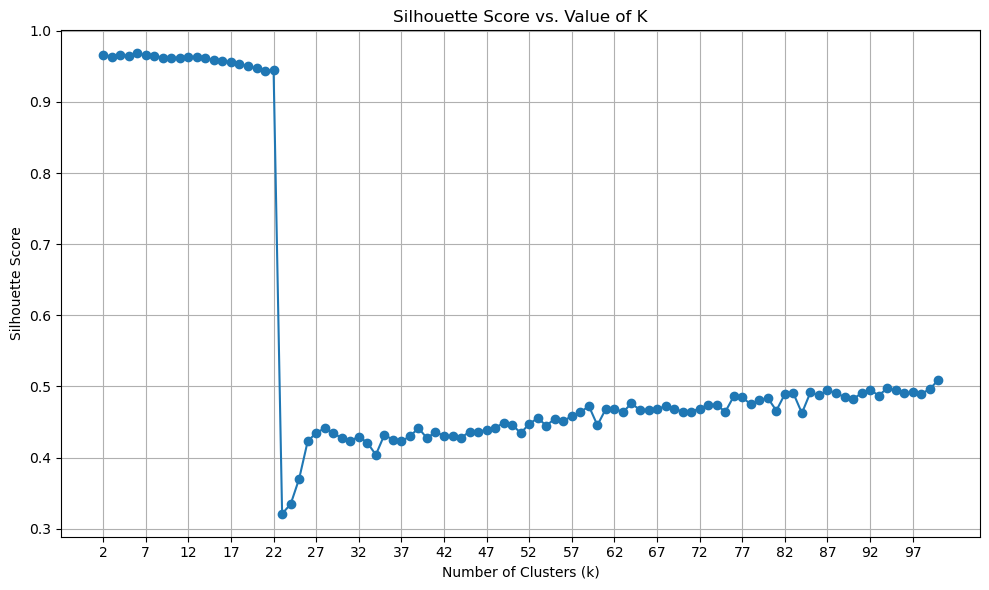

In [119]:
# Plot the silhouette scores
#Silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation)
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score vs. Value of K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 101, 5))
plt.grid(True)
plt.tight_layout()
plt.show()

In [120]:
print(f"The best k value is: {best_k}")

The best k value is: 6


In [121]:

k = best_k

In [122]:
# Anonymize sensitive attributes
dfs['Name'] = dfs['Name'].apply(lambda x: str(x)[0] + '*'*(len(str(x))-1))
dfs['Card Number'] = dfs['Card Number'].apply(lambda x: '*'*(len(str(x))-4) + str(x)[-4:])
dfs['Merchant'] = dfs['Merchant'].apply(lambda x: str(x)[0] + '*'*(len(str(x))-1))


# LSH

In [199]:
import pandas as pd
from datasketch import MinHashLSH, MinHash
import hashlib
import networkx as nx
import matplotlib.pyplot as plt

In [200]:
# Load your data into a DataFrame (replace 'data.csv' with your actual data file)
data = dfs

In [201]:
selected_columns = ['Transaction ID', 'User ID', 'Name']  # Add more columns as needed
selected_data = data[selected_columns]

In [202]:
# Convert each row to a set of shingles
def row_to_shingles(row):
    shingles = []
    for value in row:
        if isinstance(value, str):
            shingles.append(value)
        else:
            shingles.append(str(value))
    return set(shingles)

shingles = selected_data.apply(row_to_shingles, axis=1)

In [203]:
# Initialize MinHash objects for each row
minhashes = []
for shingle_set in shingles:
    m = MinHash(num_perm=128)  # Adjust num_perm as needed
    for shingle in shingle_set:
        m.update(hashlib.md5(shingle.encode('utf-8')).digest())
    minhashes.append(m)

In [205]:
# Create the LSH index
lsh = MinHashLSH(threshold=0.5, num_perm=128)

In [206]:
# Index each MinHash object
for i, minhash in enumerate(minhashes):
    lsh.insert(str(i), minhash)

In [207]:
# Create a graph to represent the mappings
G = nx.Graph()

In [208]:
# Add nodes for each item
for i in range(len(minhashes)):
    G.add_node(i, label=str(selected_data.iloc[i]))

In [209]:
# Add edges for mappings between similar items
for i, minhash in enumerate(minhashes):
    result = lsh.query(minhash)
    for idx in result:
        if int(idx) != i:
            G.add_edge(i, int(idx))

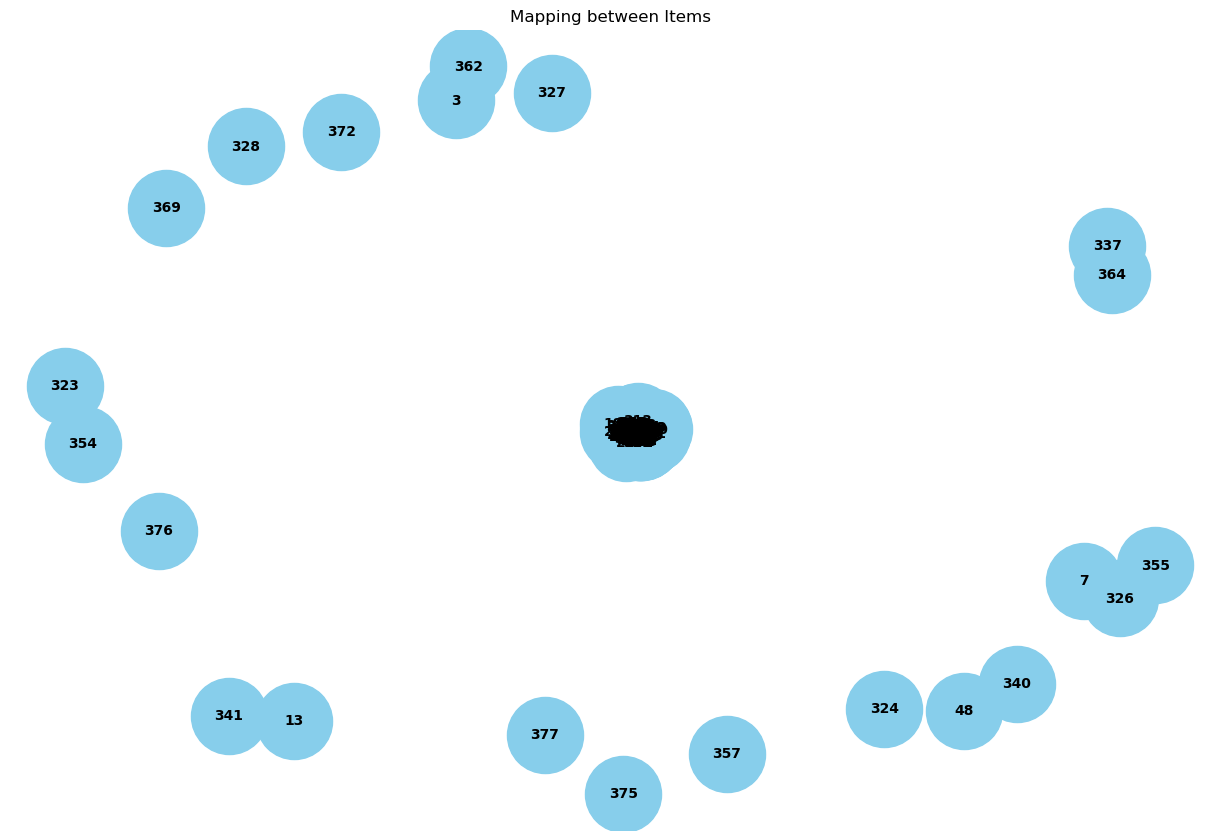

In [210]:
# Draw the graph with zooming enabled
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold')
plt.title('Mapping between Items')
plt.show()

In [197]:
import networkx as nx
import plotly.graph_objects as go
from plotly.offline import plot

# Create a sample graph
G = nx.complete_graph(10)

# Convert NetworkX graph to Plotly graph object
pos = nx.spring_layout(G)
edge_trace = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace.append(go.Scatter(x=[x0, x1], y=[y0, y1], mode='lines', line=dict(width=0.5, color='black')))

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers+text',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

# Create figure
fig = go.Figure(edge_trace + [node_trace])

# Save the graph as an HTML file
plotly_html = plot(fig, filename='graph.html')

print("Graph saved as graph.html")

Graph saved as graph.html
